###  Conditional Flow-Matching: EMNIST $\to$ Digits-MNIST

In [1]:
from DynGenModels.configs.registered_experiments import Config_MNIST_UNet_CondFlowMatch as Config

config = Config(NAME = 'emnist_to_mnist',
                DATA_SOURCE = 'emnist',
                DATA_TARGET = 'mnist',
                DATA_SPLIT_FRACS = [1.0, 0.0, 0.0],
                BATCH_SIZE = 128,
                EPOCHS = 100,
                LR = 1e-4,
                DIM_HIDDEN = 32, 
                DYNAMICS = 'ConditionalFlowMatching',
                SIGMA = 0.0,
                SOLVER ='dopri5',
                ATOL = 1e-4,
                RTOL = 1e-4,
                NUM_SAMPLING_STEPS = 100,
                DEVICE = 'cuda:3')

#...set working directory for results:

config.set_workdir(path='../../results', save_config=True)

#====================================================================================================
INFO: created directory: ../../results/emnist_to_mnist.ConditionalFlowMatching.Unet.2024.02.13_21h03
#====================================================================================================
+---------------------+-------------------------+
| Parameters          | Values                  |
+---------------------+-------------------------+
| NAME                | emnist_to_mnist         |
| DATA_SOURCE         | emnist                  |
| DATA_TARGET         | mnist                   |
| DIM_INPUT           | 784                     |
| INPUT_SHAPE         | (1, 28, 28)             |
| DEVICE              | cuda:3                  |
| OPTIMIZER           | Adam                    |
| LR                  | 0.0001                  |
| WEIGHT_DECAY        | 0.0                     |
| OPTIMIZER_BETAS     | [0.9, 0.999]            |
| OPTIMIZER_EPS       | 1e-08                

In [3]:
from DynGenModels.models.dynamical_model import Model
from DynGenModels.datamodules.mnist.datasets import MNISTDataset 
from DynGenModels.datamodules.mnist.dataloader import MNISTDataloader
from DynGenModels.dynamics.cnf.condflowmatch import ConditionalFlowMatching 
from DynGenModels.models.architectures.unet import Unet 

mnist = MNISTDataset(config)

cfm = Model(dynamics = ConditionalFlowMatching(config), 
            model = Unet(config),
            dataloader = MNISTDataloader(mnist, config), 
            config = config)

cfm.train()

number of training parameters: 1075361
start training...


INFO: building dataloaders...
INFO: train/val/test split ratios: 1.0/0.0/0.0
INFO: train size: 60000, validation size: 0, testing sizes: 0


epochs:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([1

In [ ]:
from DynGenModels.configs.registered_experiments import Config_MNIST_UNet_CondFlowMatch as Config

config_OT = Config(NAME = 'emnist_to_mnist',
                DATA_SOURCE = 'emnist',
                DATA_TARGET = 'mnist',
                DATA_SPLIT_FRACS = [1.0, 0.0, 0.0],
                BATCH_SIZE = 128,
                EPOCHS = 100,
                LR = 1e-4,
                DIM_HIDDEN = 32, 
                DYNAMICS = 'OptimalTransportFlowMatching',
                SIGMA = 0.0,
                SOLVER ='dopri5',
                ATOL = 1e-4,
                RTOL = 1e-4,
                NUM_SAMPLING_STEPS = 100,
                DEVICE = 'cuda:3')

#...set working directory for results:

config_OT.set_workdir(path='../../results', save_config=True)

from DynGenModels.models.dynamical_model import Model
from DynGenModels.datamodules.mnist.datasets import MNISTDataset 
from DynGenModels.datamodules.mnist.dataloader import MNISTDataloader
from DynGenModels.dynamics.cnf.condflowmatch import OptimalTransportFlowMatching
from DynGenModels.models.architectures.unet import Unet 

mnist_OT = MNISTDataset(config_OT)

cfm_OT = Model(dynamics = OptimalTransportFlowMatching(config_OT), 
            model = Unet(config_OT),
            dataloader = MNISTDataloader(mnist_OT, config_OT), 
            config = config_OT)

cfm_OT.train()

### generate data from trained model:

In [ ]:
from DynGenModels.pipelines.SamplingPipeline import FlowMatchPipeline 

pipeline = FlowMatchPipeline(trained_model=cfm, 
                             num_sampling_steps=200,
                             configs=config)

pipeline_OT = FlowMatchPipeline(trained_model=cfm_OT, 
                             num_sampling_steps=200,
                             configs=config_OT)

pipeline.generate_samples(input_source=mnist.source_test[:20])
pipeline_OT.generate_samples(input_source=mnist_OT.source_test[:20])

In [ ]:
from utils import plot_image_evolution
plot_image_evolution(pipeline, nrow=20, figsize=(5, 5))

In [ ]:
from utils import plot_image_evolution
plot_image_evolution(pipeline_OT, nrow=20, figsize=(5, 5))

### Experiment with classes

In [ ]:
pipeline_class = {} 
emnist_test_classes = {}

for i in range(1,27):
    emnist_test_classes[i] = mnist.source_test[mnist.source_test_labels == i]
    pipeline_class[i] = FlowMatchPipeline(trained_model=cfm, 
                                          num_sampling_steps=100,
                                          configs=config)
    pipeline_class[i].generate_samples(input_source=emnist_test_classes[i])

In [ ]:
pipeline_class_OT = {} 
emnist_test_classes_OT = {}

for i in range(1,27):
    emnist_test_classes_OT[i] = mnist_OT.source_test[mnist_OT.source_test_labels == i]
    pipeline_class_OT[i] = FlowMatchPipeline(trained_model=cfm_OT, 
                                          num_sampling_steps=100,
                                          configs=config_OT)
    pipeline_class_OT[i].generate_samples(input_source=emnist_test_classes_OT[i])

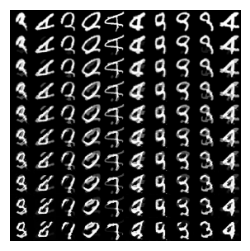

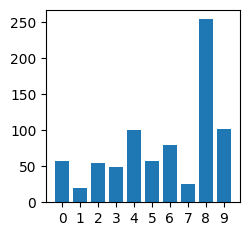

In [18]:
from utils import plot_image_evolution, mnist_classifier

c = 1
plot_image_evolution(pipeline_class[c])
mnist_classifier(pipeline_class[c], plot_histogram=True)


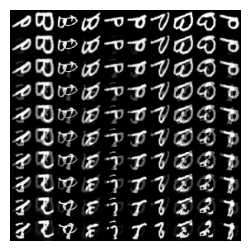

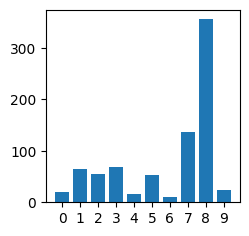

In [19]:
c = 2
plot_image_evolution(pipeline[c])
mnist_classifier(pipeline[c], plot_histogram=True)

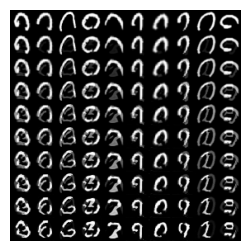

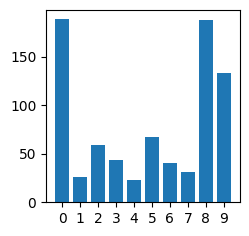

In [20]:
c = 3
plot_image_evolution(pipeline[c])
mnist_classifier(pipeline[c], plot_histogram=True)

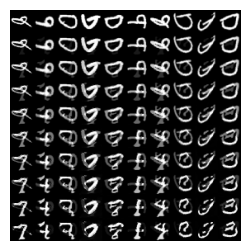

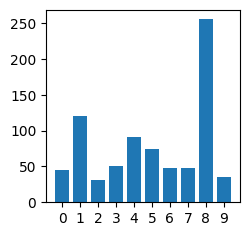

In [21]:
c = 4
plot_image_evolution(pipeline[c])
mnist_classifier(pipeline[c], plot_histogram=True)

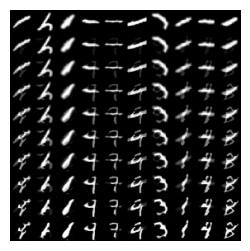

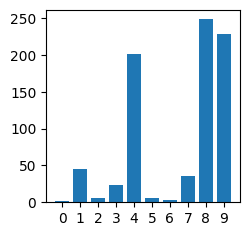

In [26]:
c = 9
plot_image_evolution(pipeline[c])
mnist_classifier(pipeline[c], plot_histogram=True)

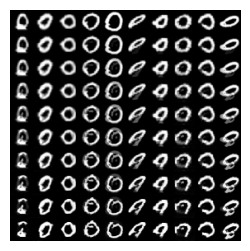

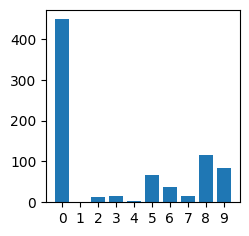

In [24]:
c = 15
plot_image_evolution(pipeline[c])
mnist_classifier(pipeline[c], plot_histogram=True)

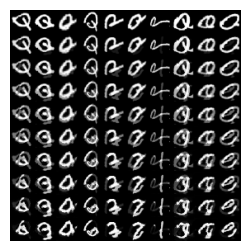

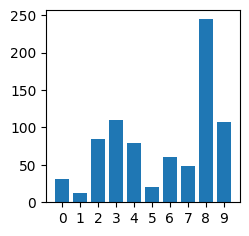

In [25]:
c = 17
plot_image_evolution(pipeline[c])
mnist_classifier(pipeline[c], plot_histogram=True)

### Out-of-distribution samples

In [27]:
from torchvision.datasets import FashionMNIST

fashion_test = FashionMNIST(root='../../data', train=False, download=True, transform=transforms.ToTensor())
fashion_test = fashion_test.data.unsqueeze(1).float() / 255.0

pipeline_ood = FlowMatchPipeline(trained_model=cfm, 
                                    num_sampling_steps=100,
                                    configs=config)

pipeline_ood.generate_samples(input_source=fashion_test[:100])

INFO: neural ODE solver with dopri5 method and steps=100


  0%|          | 0/1 [00:00<?, ?it/s]

torch.Size([100, 1, 28, 1])
torch.Size([100, 28, 1])
torch.Size([100, 1])
torch.Size([100, 1, 28, 1])
torch.Size([100, 28, 1])
torch.Size([100, 1])
torch.Size([100, 1, 28, 1])
torch.Size([100, 28, 1])
torch.Size([100, 1])
torch.Size([100, 1, 28, 1])
torch.Size([100, 28, 1])
torch.Size([100, 1])
torch.Size([100, 1, 28, 1])
torch.Size([100, 28, 1])
torch.Size([100, 1])
torch.Size([100, 1, 28, 1])
torch.Size([100, 28, 1])
torch.Size([100, 1])
torch.Size([100, 1, 28, 1])
torch.Size([100, 28, 1])
torch.Size([100, 1])
torch.Size([100, 1, 28, 1])
torch.Size([100, 28, 1])
torch.Size([100, 1])
torch.Size([100, 1, 28, 1])
torch.Size([100, 28, 1])
torch.Size([100, 1])
torch.Size([100, 1, 28, 1])
torch.Size([100, 28, 1])
torch.Size([100, 1])
torch.Size([100, 1, 28, 1])
torch.Size([100, 28, 1])
torch.Size([100, 1])
torch.Size([100, 1, 28, 1])
torch.Size([100, 28, 1])
torch.Size([100, 1])
torch.Size([100, 1, 28, 1])
torch.Size([100, 28, 1])
torch.Size([100, 1])
torch.Size([100, 1, 28, 1])
torch.Size

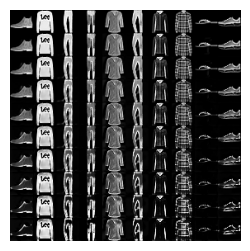

In [28]:
plot_image_evolution(pipeline_ood, nrow=10, figsize=(3, 3))
